# Universidad Nacional Abierta y a Distancia UNAD


## Curso: Análisis de datos 
## Código: 202016908

### Tarea  4  
### Algoritmos de Aprendizaje no Supervisado 

# Dataset k-means e hierarchical clustering

### pasos de la actividad

Mall Customer 
Segmentation Data: 
https://www.kaggle.com/vjchoudhary7/customer-segmentation
tutorial-in-python  
Este dataset contiene información de clientes de un mall. Las 
variables incluyen género, ingreso, puntaje de gasto, etc.  
 
o descárguelo del entorno de aprendizaje junto a la guía de 
actividades. 
 
• Con el dataset anterior diseñar los modelos de Clustering 
(agrupación): K-means e hierarchical clustering. Para cada 
algoritmo realizar los siguientes pasos: 
1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes 
hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos.  
 
• Cargar en GitHub los códigos de los modelos diseñados 
https://github.com/ 

### 1. Realizar un análisis exploratorio de los datos para identificar 
### relaciones entre variables, valores atípicos, tendencias, etc. 

In [178]:
# Importamos las librerias 
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
# Librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')


from tabulate import tabulate
from colorama import Fore, Style, init


In [111]:
# Lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [113]:
#Realizamos la exploración de los primeros 50 datos del dataset
Datos.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
### transformándolos según sea necesario.  
Utilizaremos diagramas de caja para ver valores atipicos y faltantes 

In [116]:
#Descrpción de los tados para observa si hay valores atipicos o faltantes 
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

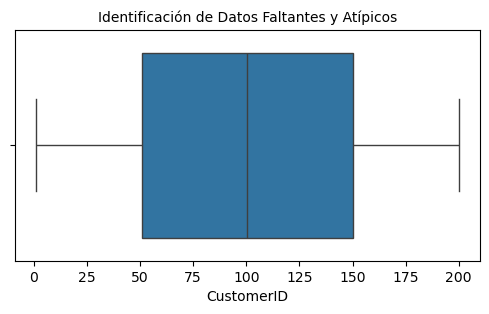

In [118]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['CustomerID' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

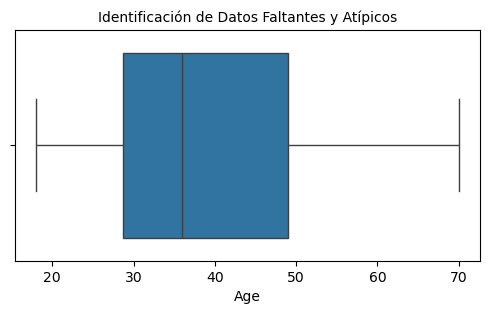

In [120]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

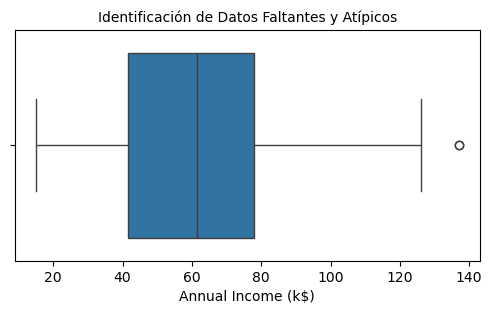

In [122]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

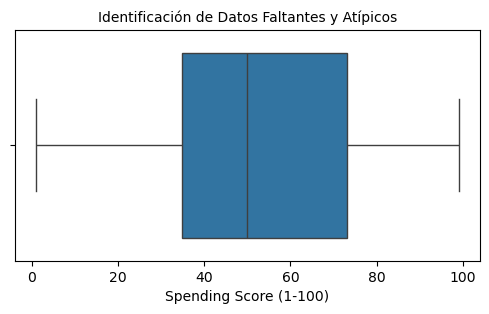

In [124]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Como podemos observar en los diagramas de cajas no hay ningun tipo de dato fuera de las posiblilidades 
asi que no debemos hacer ningun cambio en el dataset


In [127]:
#Revisión de datos faltantes
			

print("Cantidad de Registros con cero en ID de cliente: ",Datos['CustomerID'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual (k$): ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuación de gasto (1-100): ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en ID de cliente:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual (k$):  0
Cantidad de Registros con cero en Puntuación de gasto (1-100):  0


In [129]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

##Datos['Salario_Mensual' ]=Datos['Salario_Mensual' ].replace(0,Datos['Salario_Mensual'].mean())
# En este caso no se hace ningun cambio ya que no hay valores en cero o faltantes 


In [131]:
#Revision de tados atipicos o faltantes
Datos.info()
#Observamos nuevamente que no hay valores faltantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3. Seleccionar las características más relevantes para entrenar el 
### modelo utilizando selección de características.

#### Caracteristicas del interes del agrupamiento.
##### Edad	
##### Ingreso Anual (k$)	
##### Puntuación de gasto (1-100)

In [135]:
#Observamos las columnas del dataset
print(Datos.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [137]:
#Limpiar los nombres de las columnas
Datos.columns = Datos.columns.str.strip()

In [139]:
Datos = Datos[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [141]:
#Revisión de los tados con las variables para analisar y agrupar
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


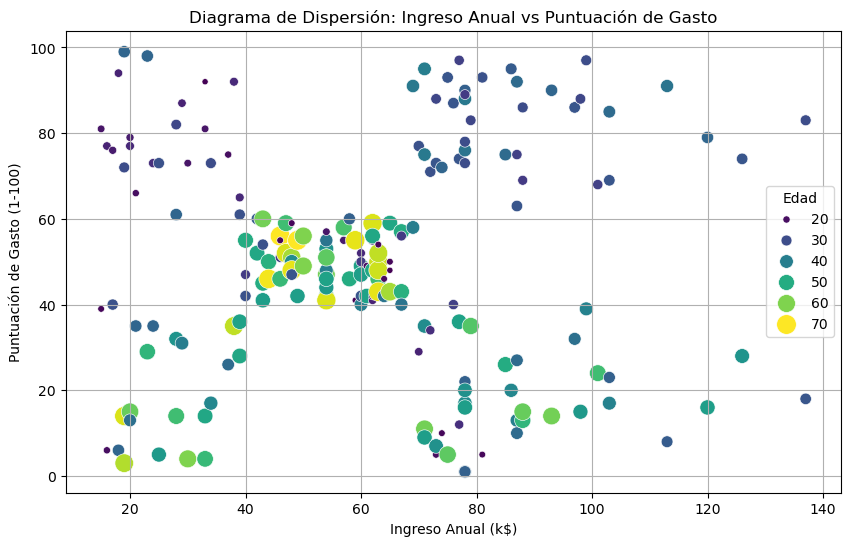

In [143]:
# Grafica antes del agrupamiento

# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Datos, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age', palette='viridis', size='Age', sizes=(20, 200))

# Configurar el título y las etiquetas
plt.title('Diagrama de Dispersión: Ingreso Anual vs Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Edad')
plt.grid()

# Mostrar el gráfico
plt.show()

Este diagrama de dispersión muestra la relación entre el ingreso anual 
y la puntuación de gasto, con el color y el tamaño de los puntos representando 
la edad de los clientes.

### 4. Entrenar el modelo configurando los diferentes 
### hiperparámetros. 

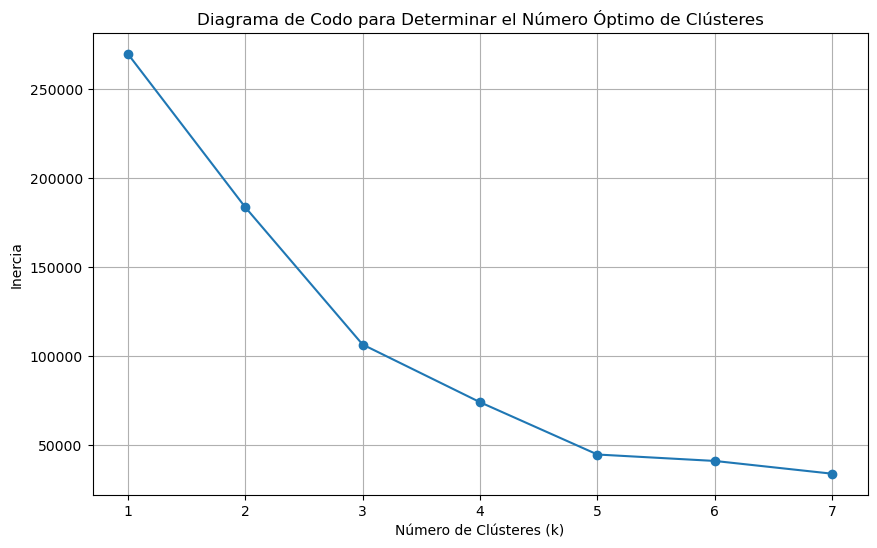

In [147]:
# Seleccionar las características para el clustering
X = Datos[["Annual Income (k$)", "Spending Score (1-100)"]]

# Lista para almacenar la inercia
inertia = []

# Calcular K-Means para diferentes valores de k
k_values = range(1, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Crear el diagrama de codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Diagrama de Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()

# Mostrar el gráfico
plt.show()

Este diagrama de codo muestra cómo cambia la inercia a medida que aumentamos el número de clústeres.
    
El "codo" en el gráfico es el punto donde la disminución de la inercia comienza a ser menos 
pronunciada. Este punto sugiere el número

In [162]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento)

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [164]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo. labels_
Datos["Grupo"] = Modelo. labels_
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      0
3     23                  16                      77      2
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


### 5 Evaluar el desempeño del modelo con métricas como 
### Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [180]:


# Desempeño del modelo con el Coeficiente de Silhouette, el Índice de Calinski-Harabasz y el Índice de Davies-Bouldin Score

# Preparación de la métrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    [Fore.CYAN + "Número de Observaciones", Fore.GREEN + str(Observaciones)],
    [Fore.CYAN + "Coeficiente Silhouette", Fore.GREEN + str(round(sil_score, 4))],
    [Fore.CYAN + "Índice Calinski-Harabasz", Fore.GREEN + str(round(calinski_score, 4))],
    [Fore.CYAN + "Índice Davies-Bouldin", Fore.GREEN + str(round(davies_score, 4))]
]

# Imprime la tabla
print(Fore.MAGENTA + "\nDesempeño del Modelo:\n")
print(tabulate(table_data, headers=[Fore.YELLOW + "Métrica", Fore.YELLOW + "Valor"], tablefmt='fancy_grid'))


Desempeño del Modelo:

╒══════════════════════════╤══════════╕
│ Métrica                  │    Valor │
╞══════════════════════════╪══════════╡
│ Número de Observaciones  │ 200      │
├──────────────────────────┼──────────┤
│ Coeficiente Silhouette   │   0.3771 │
├──────────────────────────┼──────────┤
│ Índice Calinski-Harabasz │ 133.49   │
├──────────────────────────┼──────────┤
│ Índice Davies-Bouldin    │   0.9845 │
╘══════════════════════════╧══════════╛


### 6. Realizar las diferentes gráficas que permitan visualizar los 
### resultados del modelo 

In [182]:
print(Datos.columns)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Grupo'], dtype='object')


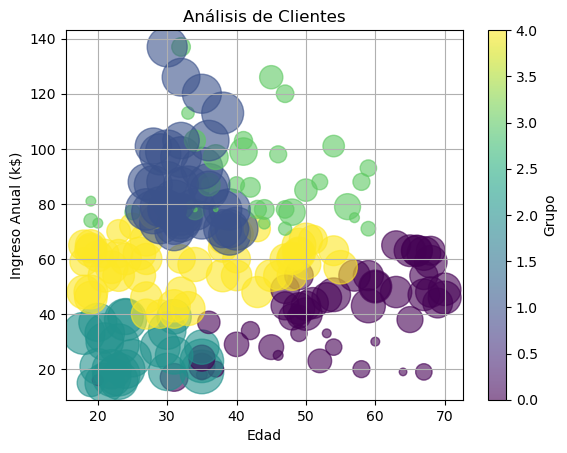

In [186]:
# Crear el gráfico de dispersión
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], s=Datos['Spending Score (1-100)']*10, c=Datos['Grupo'], cmap='viridis', alpha=0.6)

# Etiquetas de los ejes
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Análisis de Clientes')
plt.colorbar(label='Grupo')  # Añadir una barra de color para identificar los grupos
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()  # Mostrar el gráfico

### 7. Interpretar, analizar y documentar los resultados obtenidos. 

### Coeficiente de Silhouette
Valor: 0.3771
El Coeficiente de Silhouette mide qué tan separados están los clústeres y qué tan bien se agrupan las observaciones
dentro de cada uno. Este valor varía entre -1 y 1, donde:
•	Valores cercanos a 1 indican que las observaciones están bien agrupadas, con alta cohesión interna y buena
separación entre clústeres.
    
•	Valores cercanos a 0 indican que los clústeres están solapados, y los puntos están en los bordes de los clústeres.
•	Valores negativos sugieren que las observaciones pueden estar agrupadas incorrectamente.
Con un valor de 0.3771, este coeficiente indica una separación y cohesión moderada. El modelo ha identificado
ciertas relaciones dentro de los datos, pero no lo suficiente como para una separación clara. Esto puede indicar
que algunos clústeres están cercanos entre sí o que la estructura natural de los datos podría no ser ideal para un
modelo de K-Means con cinco clústeres.

### Índice de Calinski-Harabasz

Valor: 133.49
El Índice de Calinski-Harabasz evalúa la dispersión dentro y entre los clústeres. Este índice es más alto
cuando los clústeres son compactos y están bien separados. Cuanto mayor sea el valor, mejor será la formación
de clústeres en términos de separación y cohesión.
Un valor de 133.49 sugiere una cohesión razonable dentro de cada clúster y cierta separación entre los clústeres.
Aunque no es un valor extremadamente alto, es indicativo de que el modelo logró agrupar datos con una estructura
significativa, pero hay margen de mejora en cuanto a la cohesión y la separación de los clústeres.

### Índice Davies-Bouldin
Valor: 0.9845
El Índice Davies-Bouldin mide la relación de la dispersión de cada clúster con respecto a la distancia
entre clústeres. Valores más bajos de esta métrica indican una mejor calidad de los clústeres, con menor
solapamiento y buena separación entre ellos.
Con un valor de 0.9845, el índice sugiere una calidad aceptable de los clústeres, ya que este valor está
cercano a 1. Esto implica que los clústeres presentan cierta separación, aunque no óptima. La cercanía a
1 es alentadora, aunque un valor menor indicaría una mejor separación y menos solapamiento entre clústeres.

### Conclusión General
El modelo de agrupamiento ha logrado crear clústeres con una cohesión y separación moderada,
reflejada en las métricas de evaluación. Los resultados sugieren que, aunque el modelo ha capturado alguna
estructura en los datos, podría beneficiarse de una optimización, como ajustar el número de clústeres o 
explorar otros métodos de agrupamiento, que podrían mejorar la separación y la cohesión, reflejándose en 
métricas más favorables.



### 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/